In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
sdf=pd.read_csv('rolling_stones_spotify.csv')

In [38]:
sdf

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [39]:
sdf.head(5)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [40]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


# **DATA CLEANING AND PREPROCESSING**

In [41]:
sdf.duplicated().sum()

np.int64(0)

In [42]:
sdf.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
pd.to_datetime(sdf['release_date'])

,release_date
0,2022-06-10
1,2022-06-10
2,2022-06-10
3,2022-06-10
4,2022-06-10
...,...
1605,1964-04-16
1606,1964-04-16
1607,1964-04-16
1608,1964-04-16


In [44]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [45]:
sdf['id'].duplicated().sum()

np.int64(0)

<Axes: xlabel='acousticness', ylabel='Count'>

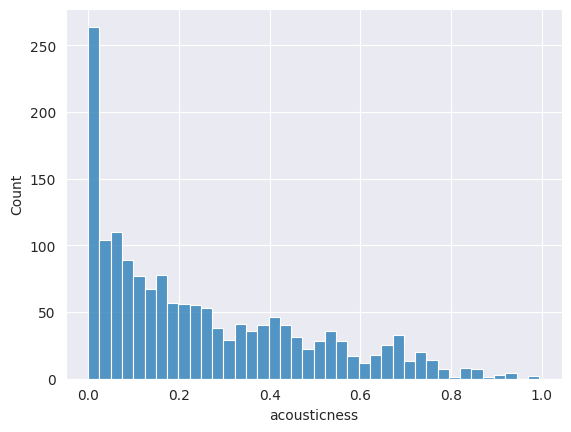

In [46]:
sns.set_style("darkgrid")
sns.histplot(sdf['acousticness'],bins=40)

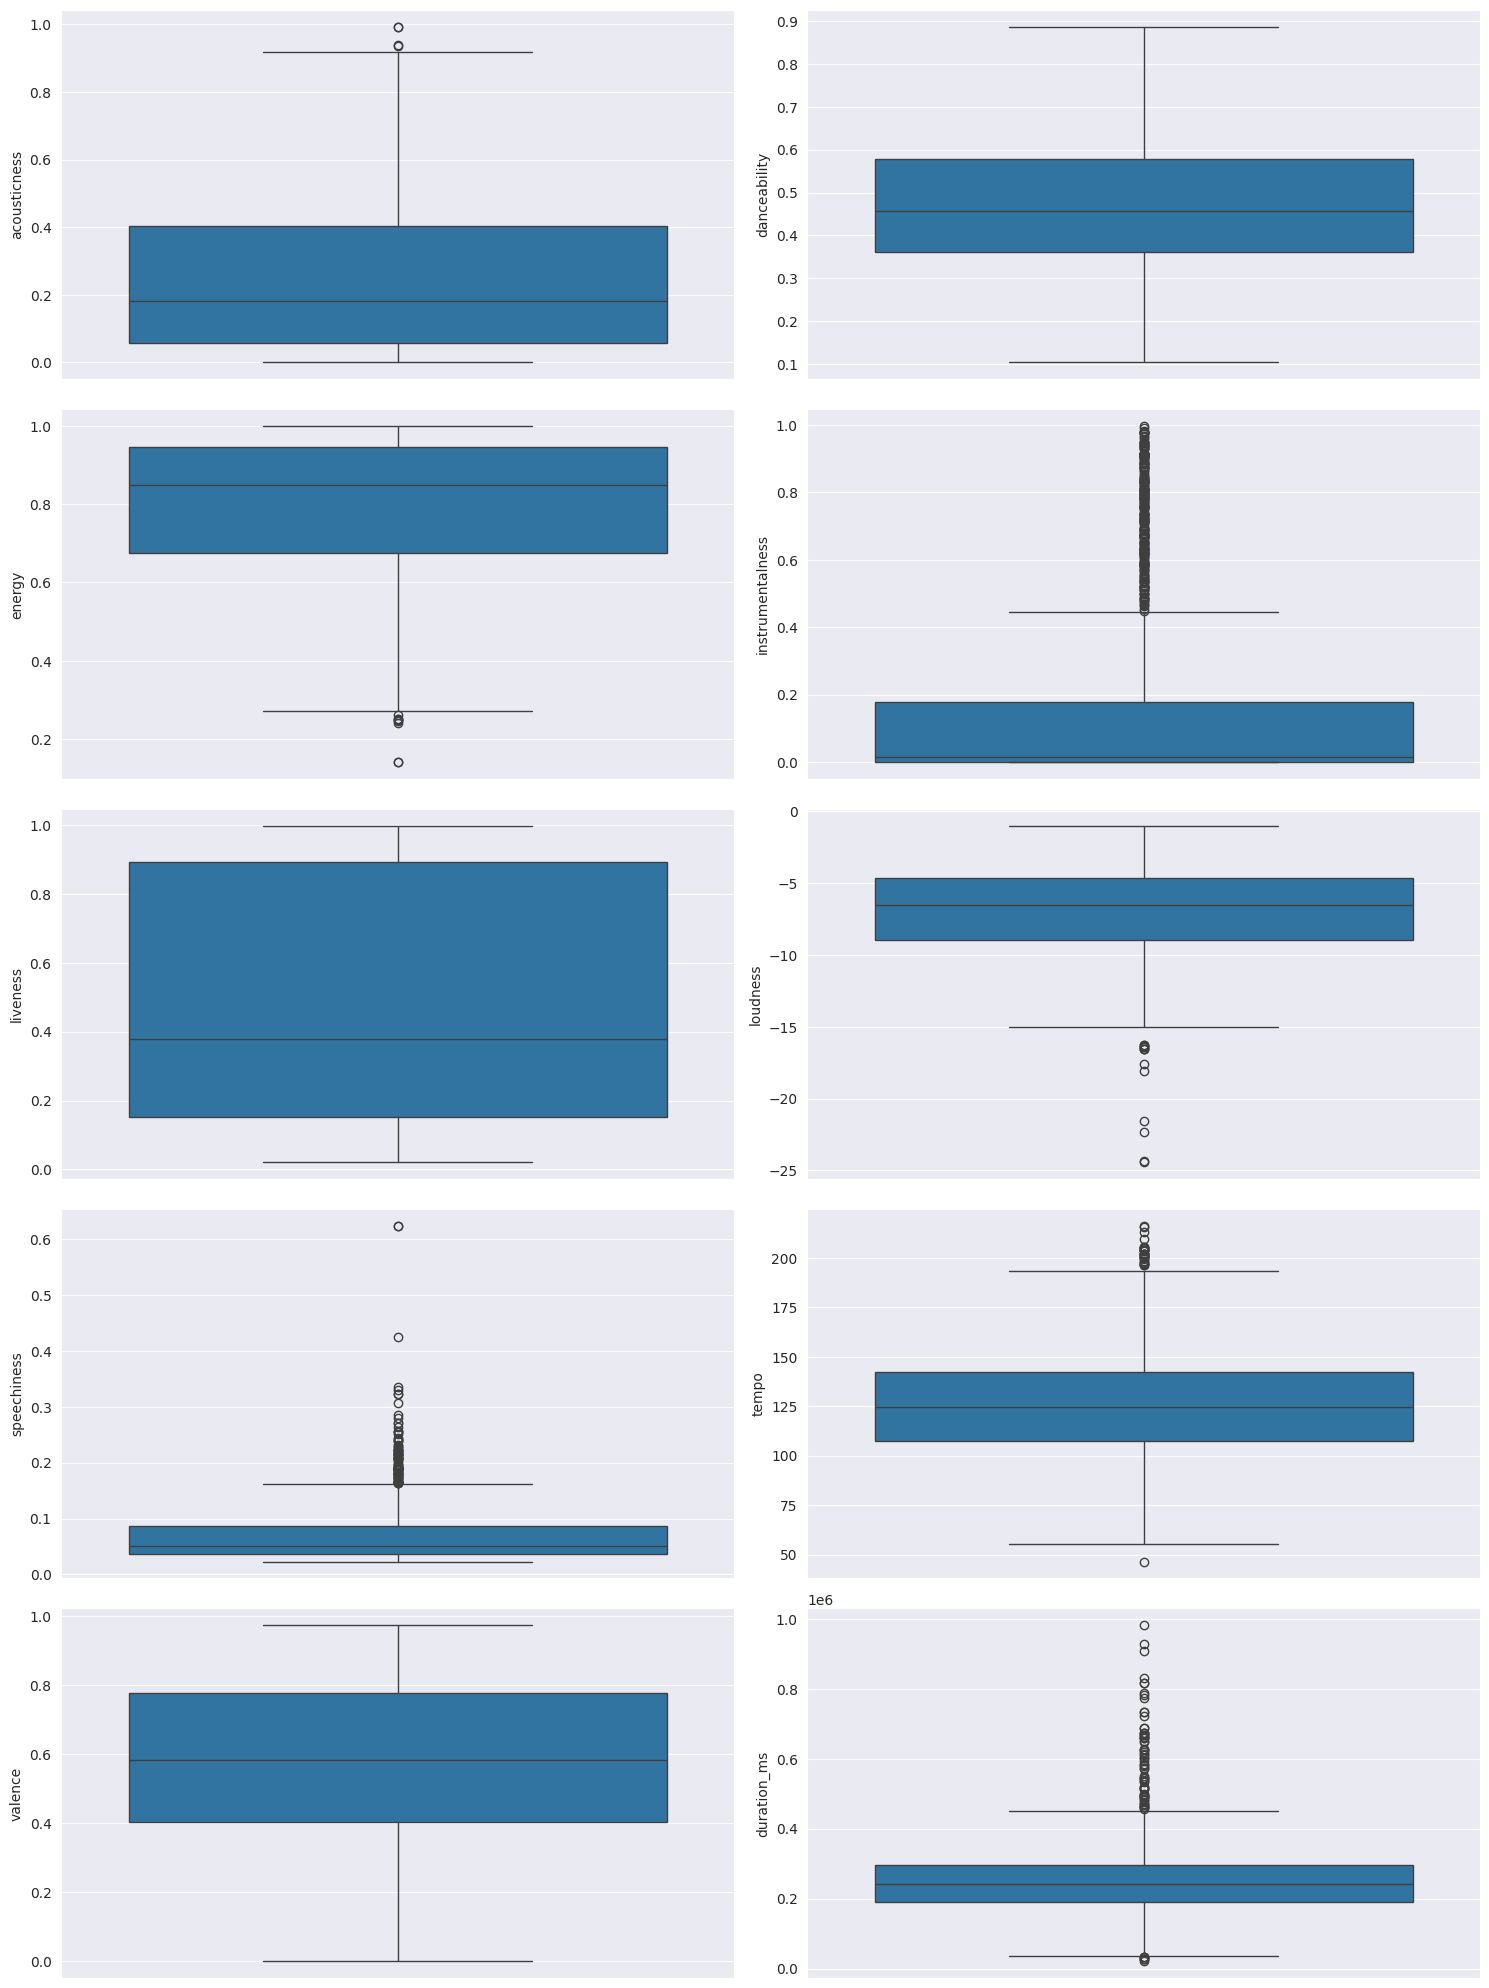

In [47]:
fig,axes=plt.subplots(5,2,figsize=(15,20))
sns.boxplot(sdf['acousticness'],ax=axes[0,0])
sns.boxplot(sdf['danceability'],ax=axes[0,1])
sns.boxplot(sdf['energy'],ax=axes[1,0])
sns.boxplot(sdf['instrumentalness'],ax=axes[1,1])
sns.boxplot(sdf['liveness'],ax=axes[2,0])
sns.boxplot(sdf['loudness'],ax=axes[2,1])
sns.boxplot(sdf['speechiness'],ax=axes[3,0])
sns.boxplot(sdf['tempo'],ax=axes[3,1])
sns.boxplot(sdf['valence'],ax=axes[4,0])
sns.boxplot(sdf['duration_ms'],ax=axes[4,1])
plt.tight_layout()
plt.show()

In [48]:
sdf.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [49]:
features=['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence','popularity', 'duration_ms']

In [50]:
def IQR(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    return lower_limit,upper_limit

df=sdf.copy()
for col in df[['acousticness', 'danceability', 'energy',
       'liveness', 'loudness', 'tempo', 'valence', 'popularity']]:
    lower_limit,upper_limit=IQR(df,col)
    sdf=sdf[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [51]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1510 non-null   object 
 1   album             1510 non-null   object 
 2   release_date      1510 non-null   object 
 3   track_number      1510 non-null   int64  
 4   id                1510 non-null   object 
 5   uri               1510 non-null   object 
 6   acousticness      1510 non-null   float64
 7   danceability      1510 non-null   float64
 8   energy            1510 non-null   float64
 9   instrumentalness  1510 non-null   float64
 10  liveness          1510 non-null   float64
 11  loudness          1510 non-null   float64
 12  speechiness       1510 non-null   float64
 13  tempo             1510 non-null   float64
 14  valence           1510 non-null   float64
 15  popularity        1510 non-null   int64  
 16  duration_ms       1510 non-null   int64  
dtype

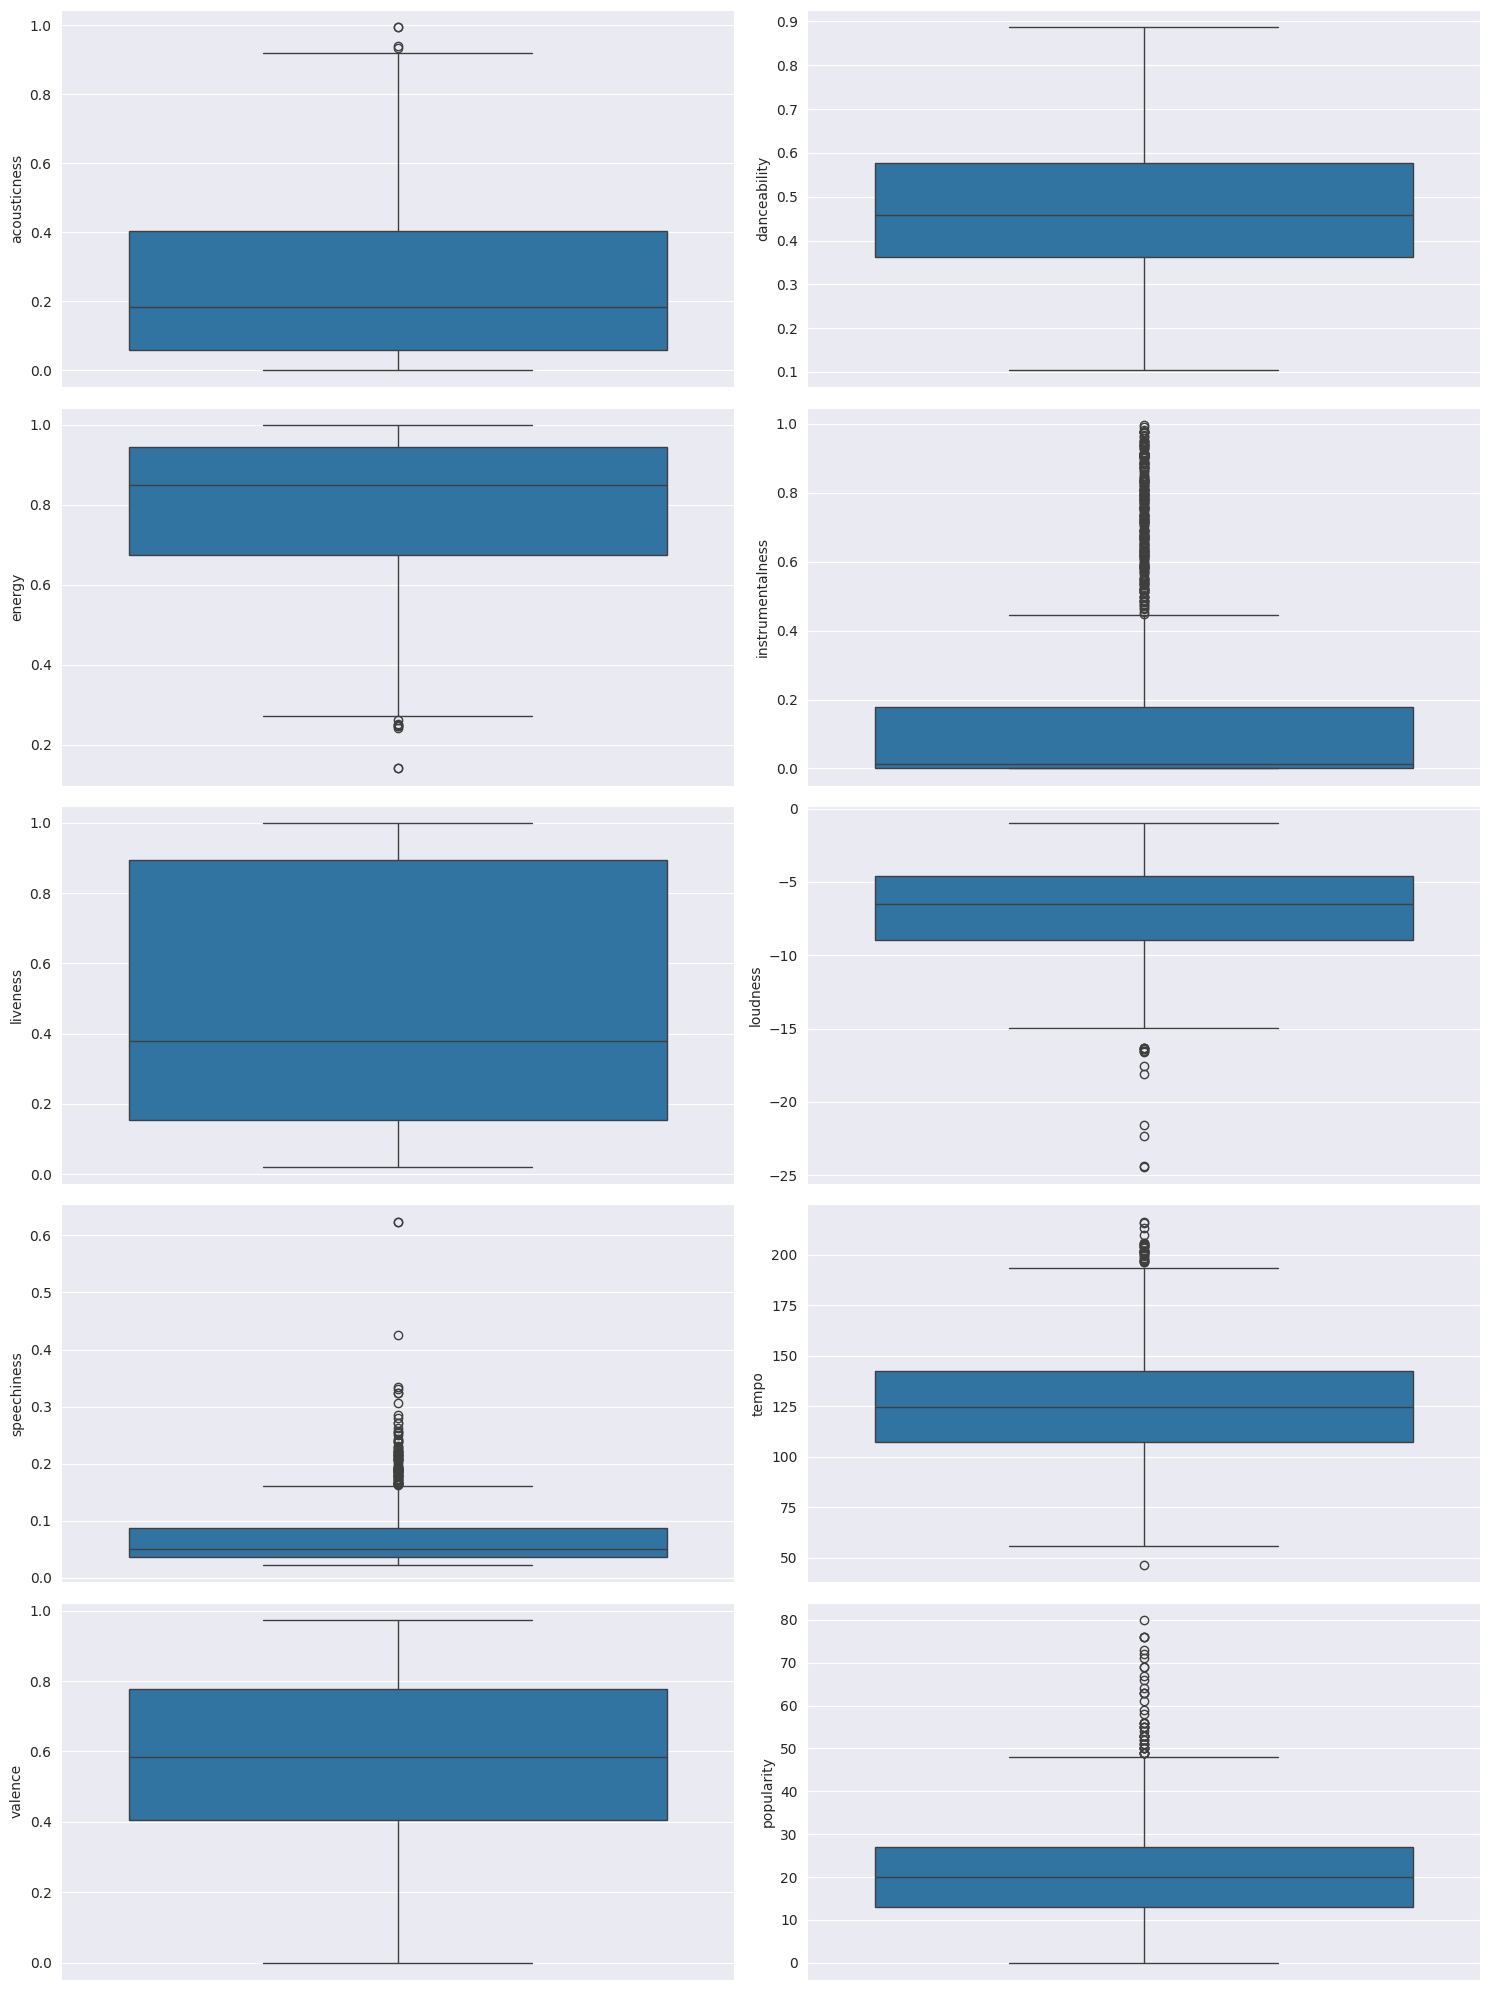

In [52]:
fig,axes=plt.subplots(5,2,figsize=(15,20))
sns.boxplot(df['acousticness'],ax=axes[0,0])
sns.boxplot(df['danceability'],ax=axes[0,1])
sns.boxplot(df['energy'],ax=axes[1,0])
sns.boxplot(df['instrumentalness'],ax=axes[1,1])
sns.boxplot(df['liveness'],ax=axes[2,0])
sns.boxplot(df['loudness'],ax=axes[2,1])
sns.boxplot(df['speechiness'],ax=axes[3,0])
sns.boxplot(df['tempo'],ax=axes[3,1])
sns.boxplot(df['valence'],ax=axes[4,0])
sns.boxplot(df['popularity'],ax=axes[4,1])
plt.tight_layout()
plt.show()

# **EXPLORATORY DATA ANAYSIS**

In [53]:
df.head(2)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173


<Axes: >

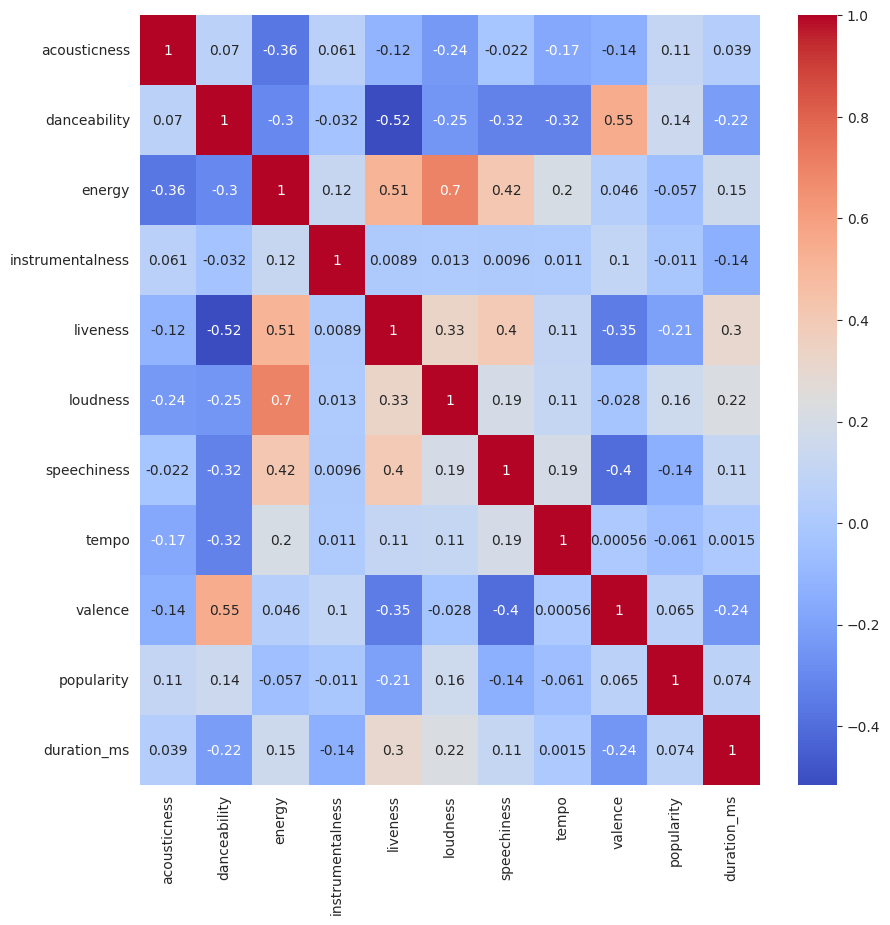

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features].corr(),annot=True,cmap="coolwarm")

<Axes: xlabel='popularity', ylabel='Count'>

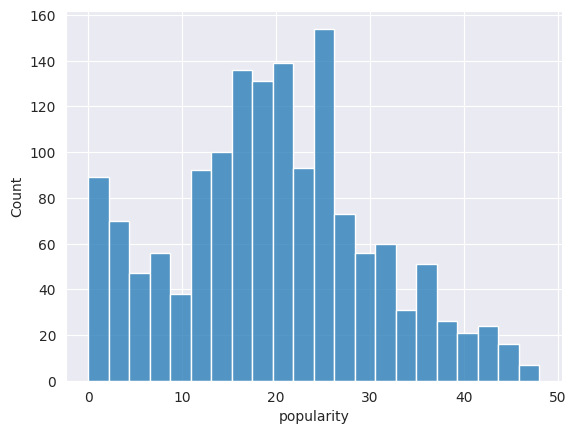

In [55]:
sns.histplot(sdf['popularity'])

Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [66]:
pop_thres=df['popularity'].quantile(0.75)
top_songs=df[df['popularity']>=pop_thres]
album_count=top_songs['album'].value_counts().head(2)

album_count

,count
album,
Honk (Deluxe),18
Exile On Main Street (2010 Re-Mastered),18


Two Albums with most porpular songs are:


1.   Honk (Deluxe)
2.   Exile On Main Street (2010 Re-Mastered)



**Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns**

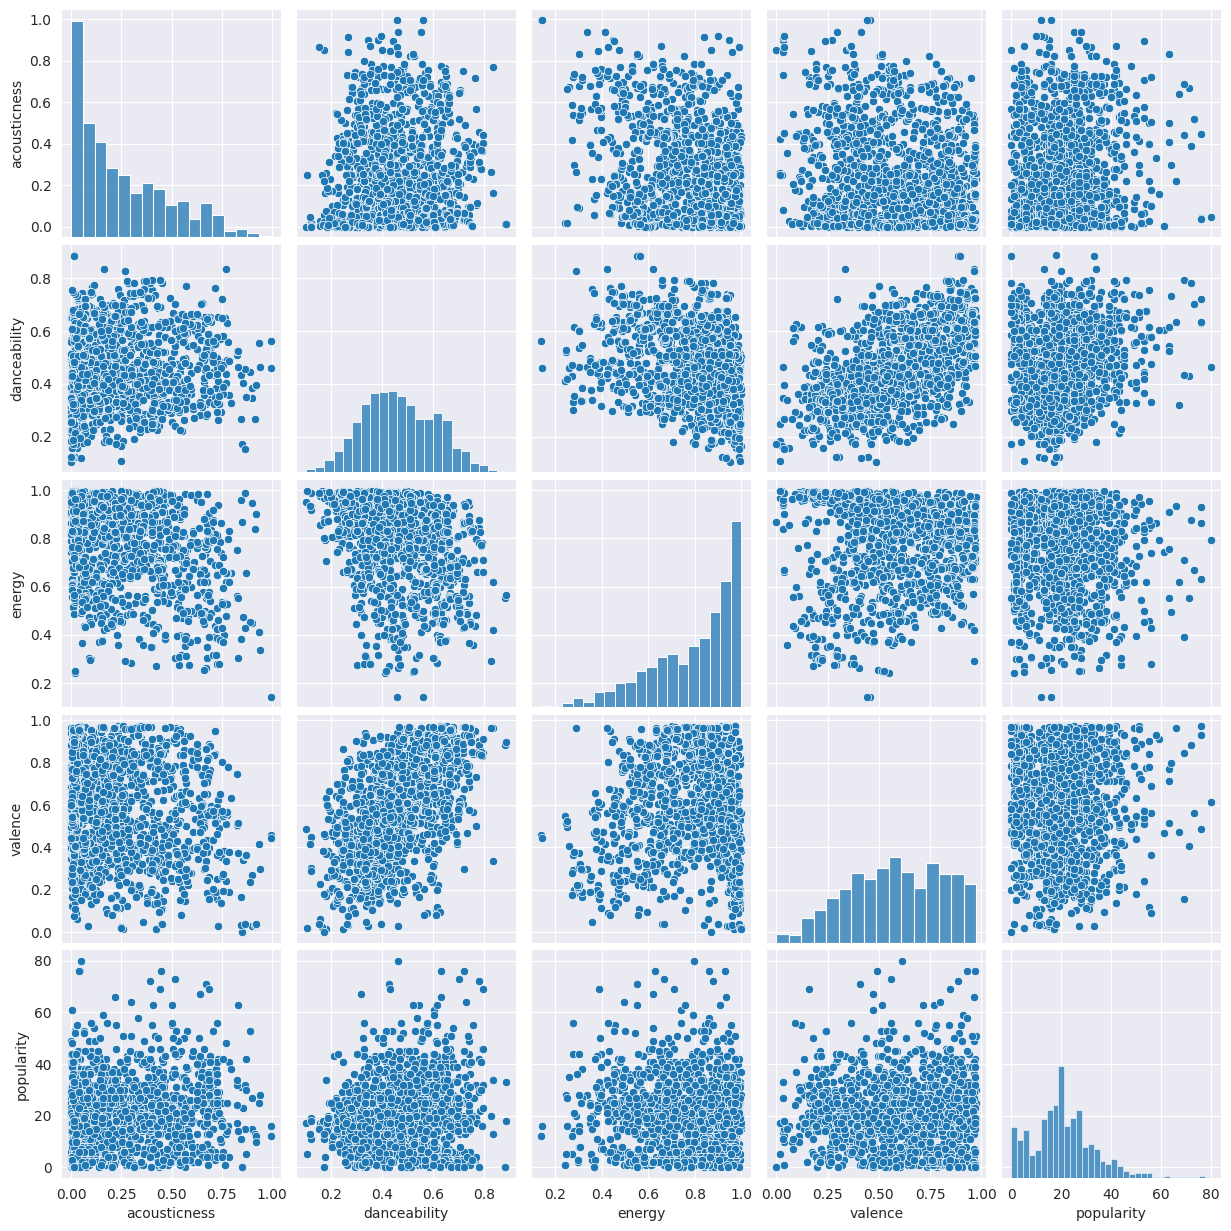

In [67]:
sns.pairplot(df, vars=['acousticness','danceability','energy','valence','popularity'])

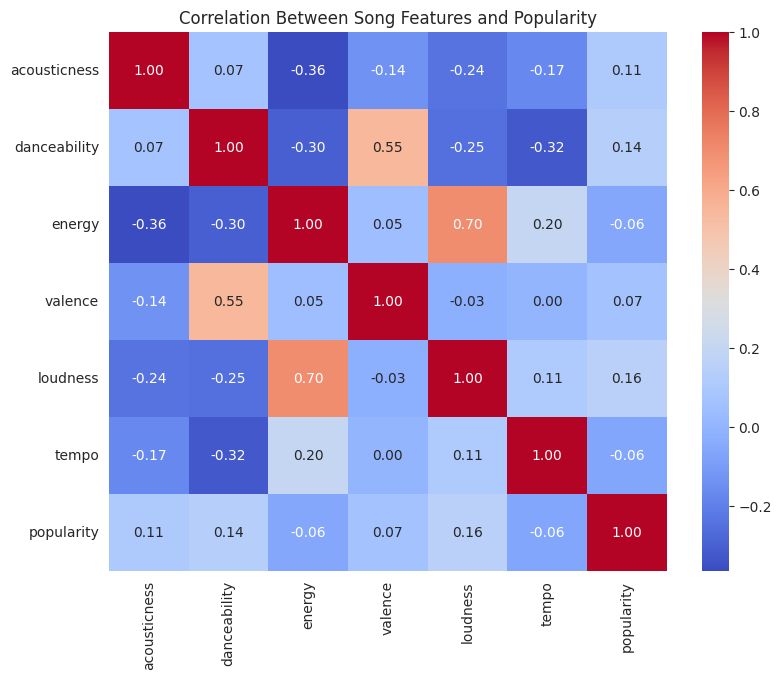

In [68]:
plt.figure(figsize=(9,7))
sns.heatmap(df[['acousticness','danceability','energy','valence','loudness','tempo','popularity']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Song Features and Popularity")
plt.show()

**Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved**

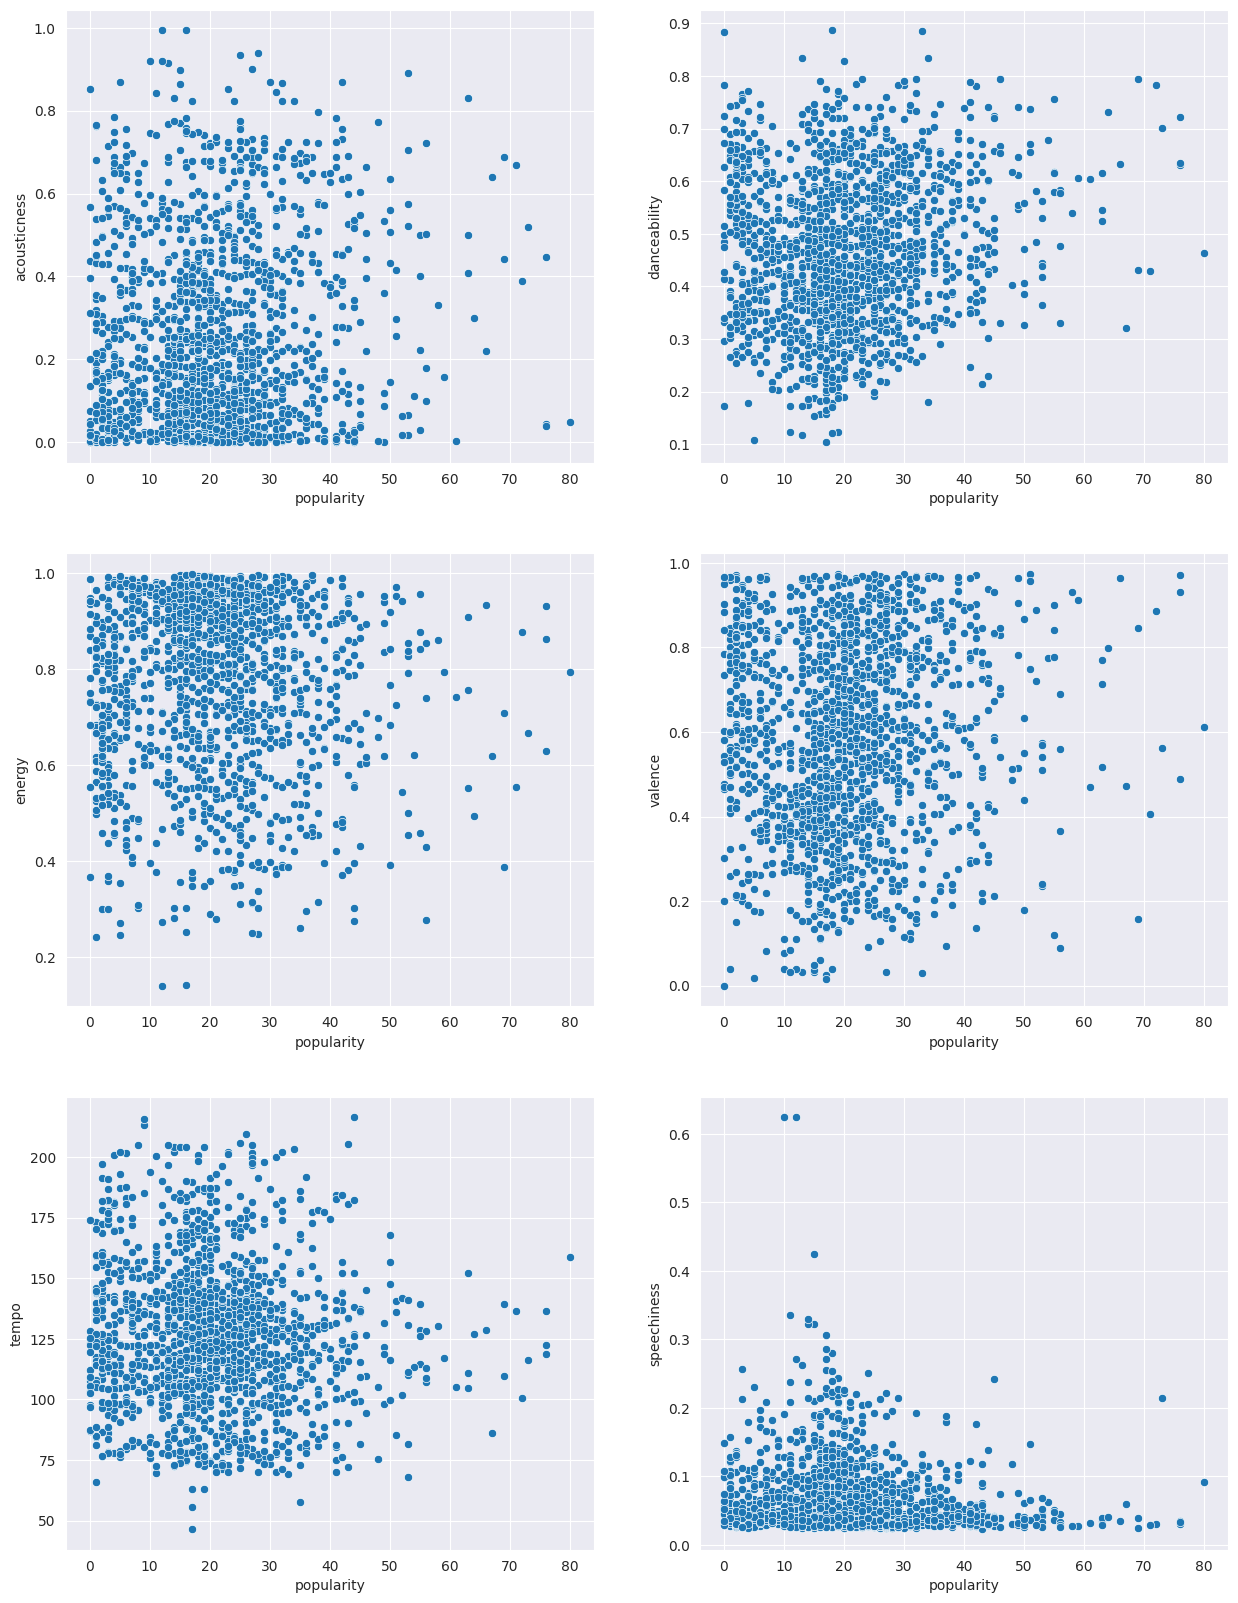

In [75]:
fig,axes=plt.subplots(3,2,figsize=(15,20))

axes=axes.flatten()
feat=['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'speechiness']
for ft in feat:
  sns.scatterplot(y=ft,x='popularity',data=df,ax=axes[feat.index(ft)])
plt.show()

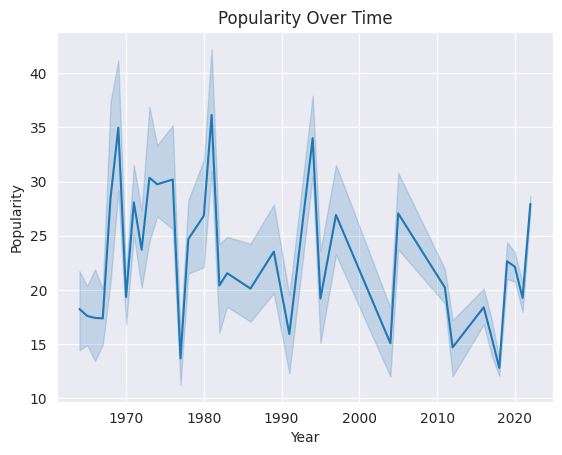

In [78]:
df['year']=pd.to_datetime(df['release_date']).dt.year

sns.lineplot(x='year',y='popularity',data=df)
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title("Popularity Over Time")
plt.show()

# **CLUSTERING WITH PCA**

Explain variance ratio is : [0.27743591 0.15085471]
Sum of explained variance ratio is : 0.42829061172441274



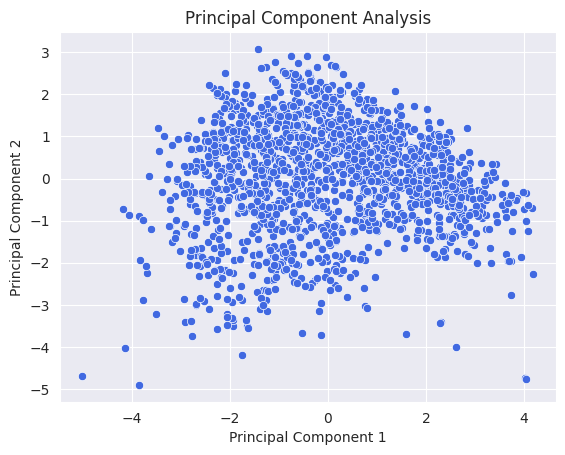

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['acousticness','danceability','energy','instrumentalness','liveness',
            'loudness','speechiness','tempo','valence','popularity','duration_ms']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(df[features])

pca=PCA(n_components=2,random_state=42)
X_pca=pca.fit_transform(X_scaled)

p_comp_df=pd.DataFrame(data=X_pca,columns=['PCA1','PCA2'])
p_comp_df

print(f"Explain variance ratio is : {pca.explained_variance_ratio_}")
print(f"Sum of explained variance ratio is : {pca.explained_variance_ratio_.sum()}\n")


sns.scatterplot(x='PCA1',y='PCA2',data=p_comp_df,color='royalblue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component Analysis")
plt.show()

In [122]:
cluster_summary=df.groupby('cluster')[features].mean().round(3)
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
cluster,,,,,,,,,,,
0,0.172,0.361,0.949,0.184,0.868,-5.242,0.119,134.416,0.430,16.915,255373.251
1,0.528,0.454,0.581,0.070,0.337,-8.514,0.045,103.045,0.396,26.302,282252.967
2,0.235,0.353,0.720,0.118,0.376,-8.607,0.059,173.853,0.550,16.283,210851.145
3,0.193,0.534,0.880,0.226,0.361,-4.909,0.051,121.813,0.761,28.042,245234.783
4,0.231,0.619,0.658,0.183,0.235,-9.965,0.048,114.422,0.764,15.922,188985.879
5,0.202,0.387,0.881,0.092,0.853,-5.842,0.088,126.524,0.435,18.168,532275.720


Insights to include in your report


1.   After reducing 11 correlated features to 2 principal components (retaining ~43% of the variance), K-Means clustering revealed distinct song cohorts.

2.   Songs with higher energy, danceability, and valence tended to group together — these likely represent energetic, popular tracks.

3. Tracks with high acousticness or instrumentalness formed separate clusters — possibly quieter or instrumental pieces.

4. Dimensionality reduction via PCA simplified the high-dimensional data into an interpretable 2D space, making visualization and pattern discovery easier.

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score=[]
wcss=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  labels=kmeans.fit_predict(X_pca)
  wcss.append(kmeans.inertia_)
  sil_score.append(silhouette_score(X_pca,labels))

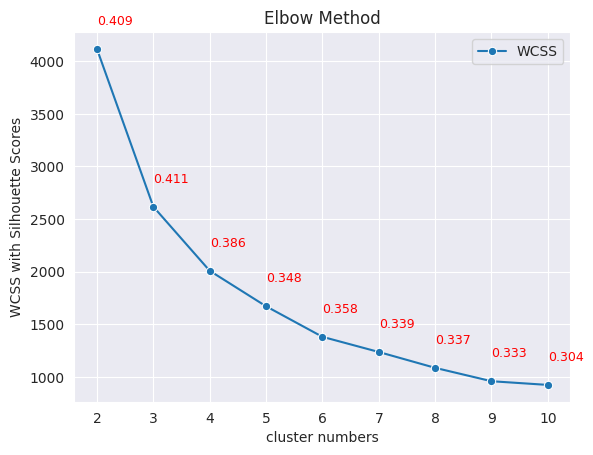

In [120]:
sns.lineplot(x=range(2,11),y=wcss,marker='o',label='WCSS',linewidth=1.5)
for i,score in zip(range(2,13),sil_score):
  plt.text(i,wcss[i-2]+200,
           ha='left',
           va='bottom',
           fontsize=9,
           color='red',
           s=f"{score:.3f}"
           )
plt.xlabel('cluster numbers')
plt.ylabel('WCSS with Silhouette Scores')
plt.title('Elbow Method')
plt.legend()
plt.show()

In [101]:
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans.fit(X_scaled)
df['cluster']=kmeans.predict(X_scaled)
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year,cluster
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640,2022,0
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173,2022,0
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160,2022,0
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880,2022,0
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080,1964,3
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266,1964,1
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080,1964,4
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680,1964,4


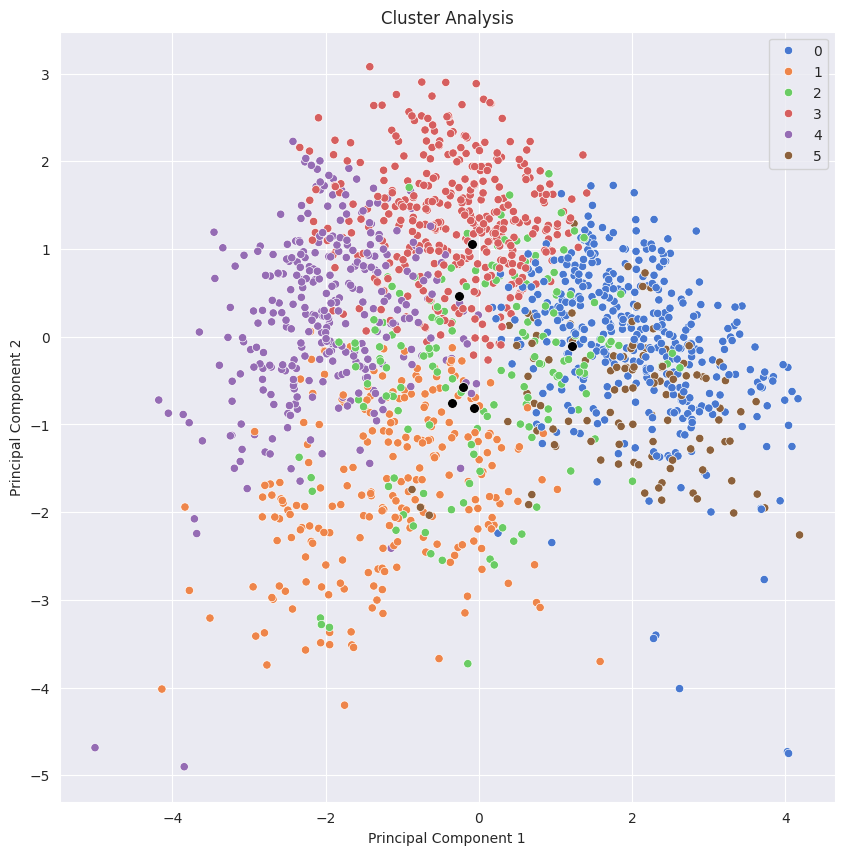

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=df['cluster'],palette='muted')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color='black',s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Analysis")
plt.show()

# **K MEANS CLUSTERING**

In [56]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [57]:
X=df.drop(['id','album','release_date','uri','name','track_number','duration_ms'],axis=1)
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33
1,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34
2,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34
3,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32
4,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32
...,...,...,...,...,...,...,...,...,...,...
1605,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39
1606,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36
1607,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30
1608,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27


In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score=[]
wcss=[]

for i in range(2,13):
  kmeans=KMeans(n_clusters=i,random_state=42)
  labels=kmeans.fit_predict(X_scaled)
  wcss.append(kmeans.inertia_)
  sil_score.append(silhouette_score(X_scaled,labels))

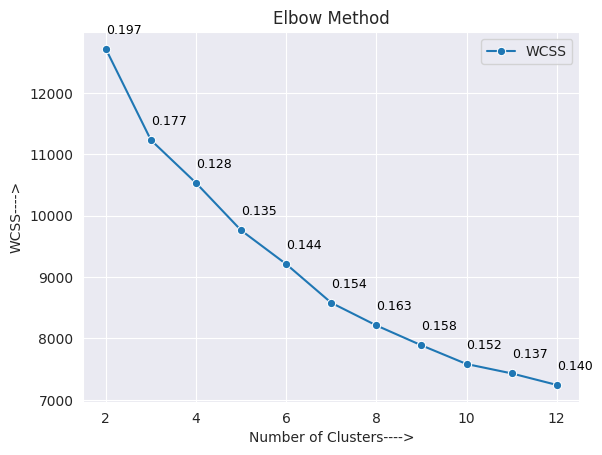

In [60]:
k_values=range(2,13)

sns.lineplot(x=k_values,y=wcss,marker='o',label='WCSS',linewidth=1.5)
for i,score in zip(k_values,sil_score):
  plt.text(i,wcss[k_values.index(i)]+200,
  f"{score:.3f}",
  ha='left',
  va='bottom',
  fontsize=9,
  color='black')

plt.xlabel("Number of Clusters---->")
plt.ylabel("WCSS---->")
plt.title("Elbow Method")
plt.legend()
plt.show()

Hence the optimal number of clusters is 6

In [61]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_scaled)
X['cluster']=kmeans.predict(X_scaled)
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster
0,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,2
1,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,0
2,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,2
3,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,2
4,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,2
...,...,...,...,...,...,...,...,...,...,...,...
1605,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,3
1606,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,1
1607,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,3
1608,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,1


In [62]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X_scaled,X['cluster'])#or score =silhouette_score(X_scaled,kmeans.labels_)
print(score)

0.12842565396931716


In [63]:
kmeans.cluster_centers_

array([[-0.35528698, -0.47354331,  0.55853241, -0.18090433,  0.76273501,
         0.45739776, -0.04993838,  0.19174128, -0.03250192, -0.23417053],
       [ 0.82801289,  0.14377761, -1.28889241, -0.27494858, -0.62973454,
        -0.95340816, -0.44659813, -0.32148578, -0.44915974,  0.04997925],
       [-0.1936358 , -1.01260726,  0.9161382 ,  0.24152555,  0.99802891,
         0.55957443,  1.70477715,  0.53692488, -1.12556926, -0.23530709],
       [-0.22212959,  0.84691436,  0.04235752,  0.28613373, -0.73491341,
         0.04441796, -0.41474314, -0.19123226,  0.94169347,  0.3072622 ]])